![Plane departing the Pacific Northwest](IMG_8801.JPG)

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport): 

- `flights2022.csv` contains information about about each flight including 

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as 
 
| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
flights=pd.read_csv("flights2022.csv")
weather=pd.read_csv("flights_weather2022.csv")

In [195]:
import numpy as np

In [196]:
#First observations at dataframes
flights.shape

(111376, 20)

In [197]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111376 entries, 0 to 111375
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111376 non-null  int64  
 1   month           111376 non-null  int64  
 2   day             111376 non-null  int64  
 3   dep_time        108931 non-null  float64
 4   sched_dep_time  111376 non-null  int64  
 5   dep_delay       108931 non-null  float64
 6   arr_time        108834 non-null  float64
 7   sched_arr_time  111376 non-null  int64  
 8   arr_delay       108697 non-null  float64
 9   carrier         111376 non-null  object 
 10  flight          111376 non-null  int64  
 11  tailnum         111247 non-null  object 
 12  origin          111376 non-null  object 
 13  dest            111376 non-null  object 
 14  air_time        108697 non-null  float64
 15  distance        111376 non-null  int64  
 16  hour            111376 non-null  int64  
 17  minute    

In [198]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.


In [199]:
weather.shape

(111006, 29)

In [200]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111006 entries, 0 to 111005
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111006 non-null  int64  
 1   month           111006 non-null  int64  
 2   day             111006 non-null  int64  
 3   dep_time        108566 non-null  float64
 4   sched_dep_time  111006 non-null  int64  
 5   dep_delay       108566 non-null  float64
 6   arr_time        108469 non-null  float64
 7   sched_arr_time  111006 non-null  int64  
 8   arr_delay       108332 non-null  float64
 9   carrier         111006 non-null  object 
 10  flight          111006 non-null  int64  
 11  tailnum         110877 non-null  object 
 12  origin          111006 non-null  object 
 13  dest            111006 non-null  object 
 14  air_time        108332 non-null  float64
 15  distance        111006 non-null  int64  
 16  hour            111006 non-null  int64  
 17  minute    

In [201]:
weather.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,airline,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,United Air Lines Inc.,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,Alaska Airlines Inc.,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,Alaska Airlines Inc.,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,Alaska Airlines Inc.,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,United Air Lines Inc.,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [202]:
#Cleaning the datasets for analysing
#The first thing I have realized that there are four columns indicates the date in flights dataset. So, some or one of them can be unnecessary.
#Check these columns.
flights[["year","month","day","time_hour"]]

,year,month,day,time_hour
0,2022,1,1,2022-01-01T23:00:00Z
1,2022,1,1,2022-01-01T22:00:00Z
2,2022,1,1,2022-01-01T23:00:00Z
3,2022,1,1,2022-01-01T23:00:00Z
4,2022,1,1,2022-01-01T23:00:00Z
...,...,...,...,...
111371,2022,6,30,2022-06-30T11:00:00Z
111372,2022,6,30,2022-06-30T14:00:00Z
111373,2022,6,30,2022-06-30T17:00:00Z
111374,2022,6,30,2022-06-30T11:00:00Z


In [203]:
#Check the dates whether includes Null values or not
flights[["year","month","day","time_hour"]].isnull().sum()

year         0
month        0
day          0
time_hour    0
dtype: int64

In [204]:
#Drop the time_hour column
flights.drop("time_hour",axis=1,inplace=True)

In [205]:
flights.shape

(111376, 19)

In [206]:
weather.shape

(111006, 29)

In [207]:
#Merge the tables
flights1=weather.merge(flights,how="inner")

In [208]:
flights1.shape

(111006, 29)

In [209]:
flights1.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,airline,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,United Air Lines Inc.,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,Alaska Airlines Inc.,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,Alaska Airlines Inc.,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,Alaska Airlines Inc.,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,United Air Lines Inc.,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [210]:
#Since we observe the delay of departures, we don't need any columns about arrival time. We will drop the columns ["arr_time","sched_arr_time","arr_delay","air_time"]
flights1.drop(["arr_time","sched_arr_time","arr_delay","air_time"],inplace=True,axis=1)

In [211]:
flights1.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute,airline,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,UA,555,N405UA,SEA,IAH,1874,23,59,United Air Lines Inc.,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,AS,72,N265AK,SEA,FAI,1533,22,50,Alaska Airlines Inc.,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,AS,270,N274AK,SEA,ATL,2182,23,55,Alaska Airlines Inc.,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,AS,7,N281AK,SEA,ORD,1721,23,50,Alaska Airlines Inc.,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,UA,507,N426UA,PDX,ORD,1739,23,49,United Air Lines Inc.,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [212]:
#Also realize that sched_dep_time is unncesessary since hour and min columns gives the same information. Drop sched_dep_time column too.
flights1.drop("sched_dep_time",inplace=True,axis=1)

In [213]:
flights1.shape

(111006, 24)

In [214]:
flights1.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'distance', 'hour', 'minute', 'airline',
       'route', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust',
       'precip', 'pressure', 'visib'],
      dtype='object')

In [215]:
#Rearrange the columns.
list_col=['year', 'month', 'day', 'hour', 'minute','dep_time', 'dep_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'distance',  'airline',
       'route', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust',
       'precip', 'pressure', 'visib']

In [216]:
flights1=flights1[list_col]

In [217]:
flights1.head()

,year,month,day,hour,minute,dep_time,dep_delay,carrier,flight,tailnum,origin,dest,distance,airline,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,23,59,1.0,2.0,UA,555,N405UA,SEA,IAH,1874,United Air Lines Inc.,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,22,50,1.0,71.0,AS,72,N265AK,SEA,FAI,1533,Alaska Airlines Inc.,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,23,55,10.0,15.0,AS,270,N274AK,SEA,ATL,2182,Alaska Airlines Inc.,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,23,50,25.0,35.0,AS,7,N281AK,SEA,ORD,1721,Alaska Airlines Inc.,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,23,49,35.0,46.0,UA,507,N426UA,PDX,ORD,1739,United Air Lines Inc.,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [218]:
#Create a column shows exact date.
flights1["dep_date"]=pd.to_datetime(flights1[["year","month","day"]])

In [219]:
#Changing the date format
flights1["dep_date"]=flights1["dep_date"].dt.strftime('%Y-%m-%d')

In [220]:
#Now, we can drop the columns year, month, and date
flights1.drop(["year","day","month"],axis=1,inplace=True)

In [221]:
flights1.head()

,hour,minute,dep_time,dep_delay,carrier,flight,tailnum,origin,dest,distance,airline,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,dep_date
0,23,59,1.0,2.0,UA,555,N405UA,SEA,IAH,1874,United Air Lines Inc.,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01
1,22,50,1.0,71.0,AS,72,N265AK,SEA,FAI,1533,Alaska Airlines Inc.,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,2022-01-01
2,23,55,10.0,15.0,AS,270,N274AK,SEA,ATL,2182,Alaska Airlines Inc.,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01
3,23,50,25.0,35.0,AS,7,N281AK,SEA,ORD,1721,Alaska Airlines Inc.,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01
4,23,49,35.0,46.0,UA,507,N426UA,PDX,ORD,1739,United Air Lines Inc.,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,2022-01-01


In [222]:
#Now, we will create a column which show the scheduled departure time as sched_dep_time.

In [223]:
flights1["sched_dep_time"]=pd.to_datetime(flights1['hour'].astype(str) + ':' + flights1['minute'].astype(str), format='%H:%M')

In [224]:
flights1["sched_dep_time"]=pd.to_datetime(flights1["sched_dep_time"]).dt.strftime('%H:%M')

In [225]:
#So, we don't need hour and min column anymore.
flights1.drop(["hour","minute"],axis=1,inplace=True)

In [226]:
#Ordering columns
flights1.columns

Index(['dep_time', 'dep_delay', 'carrier', 'flight', 'tailnum', 'origin',
       'dest', 'distance', 'airline', 'route', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'dep_date', 'sched_dep_time'],
      dtype='object')

In [227]:
order_column=['airline',
              'flight',
              'tailnum',
              'route',
              'carrier',
              'distance',
              'dep_date', 
              'sched_dep_time',
              'dep_time', 
              'dep_delay',                                                              
              'temp', 
              'dewp', 
              'humid',
              'wind_dir', 
              'wind_speed',
              'wind_gust',
              'precip',
              'pressure', 
              'visib',
              ]

In [228]:
flights1=flights1[order_column]

In [229]:
flights1.head()

,airline,flight,tailnum,route,carrier,distance,dep_date,sched_dep_time,dep_time,dep_delay,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,United Air Lines Inc.,555,N405UA,SEA-IAH,UA,1874,2022-01-01,23:59,1.0,2.0,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,Alaska Airlines Inc.,72,N265AK,SEA-FAI,AS,1533,2022-01-01,22:50,1.0,71.0,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,Alaska Airlines Inc.,270,N274AK,SEA-ATL,AS,2182,2022-01-01,23:55,10.0,15.0,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,Alaska Airlines Inc.,7,N281AK,SEA-ORD,AS,1721,2022-01-01,23:50,25.0,35.0,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,United Air Lines Inc.,507,N426UA,PDX-ORD,UA,1739,2022-01-01,23:49,35.0,46.0,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [230]:
#Creating a function convert the dep_time values to time format in string
def time_func(time): 
    if len(time)==1:
       time= "00:0"+time
    elif len(time)==2:
       time= "00:"+time
    elif len(time)==3:
       time="0"+time
       time=list(time)
       time.insert(2,":")
       time="".join(time)
    else:
       time=list(time)
       time.insert(2,":")
       time="".join(time)
    return time

In [231]:
#The last part of arrangment is that create a new columns which shows delayed departure date instead of using dep_time column because as we
#observe the values, they are appropiate for converting.

In [232]:
flights1["sched_dep_time"]=pd.to_datetime(flights1["sched_dep_time"],format=('%H:%M')).dt.time

In [233]:
flights1.head()

,airline,flight,tailnum,route,carrier,distance,dep_date,sched_dep_time,dep_time,dep_delay,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,United Air Lines Inc.,555,N405UA,SEA-IAH,UA,1874,2022-01-01,23:59:00,1.0,2.0,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,Alaska Airlines Inc.,72,N265AK,SEA-FAI,AS,1533,2022-01-01,22:50:00,1.0,71.0,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,Alaska Airlines Inc.,270,N274AK,SEA-ATL,AS,2182,2022-01-01,23:55:00,10.0,15.0,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,Alaska Airlines Inc.,7,N281AK,SEA-ORD,AS,1721,2022-01-01,23:50:00,25.0,35.0,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,United Air Lines Inc.,507,N426UA,PDX-ORD,UA,1739,2022-01-01,23:49:00,35.0,46.0,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [234]:
flights1["sched_dep_time"] = pd.to_datetime(flights1["sched_dep_time"], format="%H:%M:%S")

flights1["departure"] = flights1["sched_dep_time"] + pd.to_timedelta(flights1["dep_delay"], unit="m")

flights1["departure_time"] = flights1["departure"].dt.time
flights1["sched_dep_time"] = flights1["sched_dep_time"].dt.time

In [235]:
flights1.head()

,airline,flight,tailnum,route,carrier,distance,dep_date,sched_dep_time,dep_time,dep_delay,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,departure,departure_time
0,United Air Lines Inc.,555,N405UA,SEA-IAH,UA,1874,2022-01-01,23:59:00,1.0,2.0,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,1900-01-02 00:01:00,00:01:00
1,Alaska Airlines Inc.,72,N265AK,SEA-FAI,AS,1533,2022-01-01,22:50:00,1.0,71.0,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,1900-01-02 00:01:00,00:01:00
2,Alaska Airlines Inc.,270,N274AK,SEA-ATL,AS,2182,2022-01-01,23:55:00,10.0,15.0,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,1900-01-02 00:10:00,00:10:00
3,Alaska Airlines Inc.,7,N281AK,SEA-ORD,AS,1721,2022-01-01,23:50:00,25.0,35.0,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,1900-01-02 00:25:00,00:25:00
4,United Air Lines Inc.,507,N426UA,PDX-ORD,UA,1739,2022-01-01,23:49:00,35.0,46.0,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,1900-01-02 00:35:00,00:35:00


In [236]:
flights1.drop(["dep_time","departure"],inplace=True,axis=1)

In [237]:
flights1.columns

Index(['airline', 'flight', 'tailnum', 'route', 'carrier', 'distance',
       'dep_date', 'sched_dep_time', 'dep_delay', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'departure_time'],
      dtype='object')

Reordering columns by a new departure time column

In [238]:
flights1=flights1[['airline', 'flight', 'tailnum', 'route', 'carrier', 'distance',
       'dep_date', 'sched_dep_time', 'dep_delay', 'departure_time','temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib'
       ]]

In [239]:
flights1.head()

,airline,flight,tailnum,route,carrier,distance,dep_date,sched_dep_time,dep_delay,departure_time,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,United Air Lines Inc.,555,N405UA,SEA-IAH,UA,1874,2022-01-01,23:59:00,2.0,00:01:00,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,Alaska Airlines Inc.,72,N265AK,SEA-FAI,AS,1533,2022-01-01,22:50:00,71.0,00:01:00,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,Alaska Airlines Inc.,270,N274AK,SEA-ATL,AS,2182,2022-01-01,23:55:00,15.0,00:10:00,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,Alaska Airlines Inc.,7,N281AK,SEA-ORD,AS,1721,2022-01-01,23:50:00,35.0,00:25:00,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,United Air Lines Inc.,507,N426UA,PDX-ORD,UA,1739,2022-01-01,23:49:00,46.0,00:35:00,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [240]:
#Now, we are starting data analysis. Here is the table indicated the average of delay and number of cancellations by route.
routes_delays_cancels=flights1.groupby("route").agg(avg_dep_delays=("dep_delay","mean"),
                              total_cancellations=("dep_delay",lambda x:x.isnull().sum())
                             ).reset_index()

In [241]:
#Top 10 routes by average delays.
top_routes_by_delay=routes_delays_cancels[["route","avg_dep_delays"]].round(2).sort_values(by="avg_dep_delays",ascending=False).head(10).reset_index(drop=True)

In [242]:
top_routes_by_delay

,route,avg_dep_delays
0,PDX-DSM,35.78
1,PDX-GRR,35.74
2,SEA-MIA,29.92
3,PDX-FLL,28.04
4,SEA-CLT,27.31
5,PDX-STL,27.00
6,PDX-BOS,25.02
7,PDX-DFW,24.89
8,PDX-DAL,24.10
9,PDX-JFK,21.96


In [243]:
#Top 10 routes by number of cancellations.
top_routes_by_cancellations=routes_delays_cancels[["route","total_cancellations"]].round(2).sort_values(by="total_cancellations",ascending=False).head(10).reset_index(drop=True)

In [244]:
top_routes_by_cancellations

,route,total_cancellations
0,SEA-LAX,93
1,SEA-ANC,78
2,SEA-SFO,73
3,SEA-LAS,73
4,SEA-PDX,71
5,SEA-JFK,70
6,PDX-SEA,68
7,SEA-DEN,66
8,SEA-ORD,63
9,SEA-PHX,60


In [245]:
#Another the table indicated the average of delay and number of cancellations by airlines
airlines_delays_cancels=flights1.groupby("airline").agg(avg_dep_delays=("dep_delay","mean"),
                              total_cancellations=("dep_delay",lambda x:x.isnull().sum())
                             ).reset_index()

In [246]:
top_airlines_by_delay=airlines_delays_cancels[["airline","avg_dep_delays"]].round(2).sort_values(by="avg_dep_delays",ascending=False).head(10).reset_index(drop=True)

In [247]:
top_airlines_by_delay

,airline,avg_dep_delays
0,JetBlue Airways,42.11
1,Allegiant Air,26.77
2,American Airlines Inc.,20.18
3,Frontier Airlines Inc.,14.25
4,Southwest Airlines Co.,11.34
5,Spirit Air Lines,10.84
6,Delta Air Lines Inc.,10.64
7,Hawaiian Airlines Inc.,8.24
8,United Air Lines Inc.,7.09
9,Alaska Airlines Inc.,6.75


In [248]:
top_airlines_by_cancellations=airlines_delays_cancels[["airline","total_cancellations"]].round(2).sort_values(by="total_cancellations",ascending=False).head(10).reset_index(drop=True)

In [249]:
top_airlines_by_cancellations

,airline,total_cancellations
0,Alaska Airlines Inc.,1298
1,Delta Air Lines Inc.,382
2,Horizon Air,238
3,SkyWest Airlines Inc.,165
4,Southwest Airlines Co.,100
5,American Airlines Inc.,85
6,United Air Lines Inc.,80
7,Spirit Air Lines,38
8,JetBlue Airways,32
9,Frontier Airlines Inc.,12


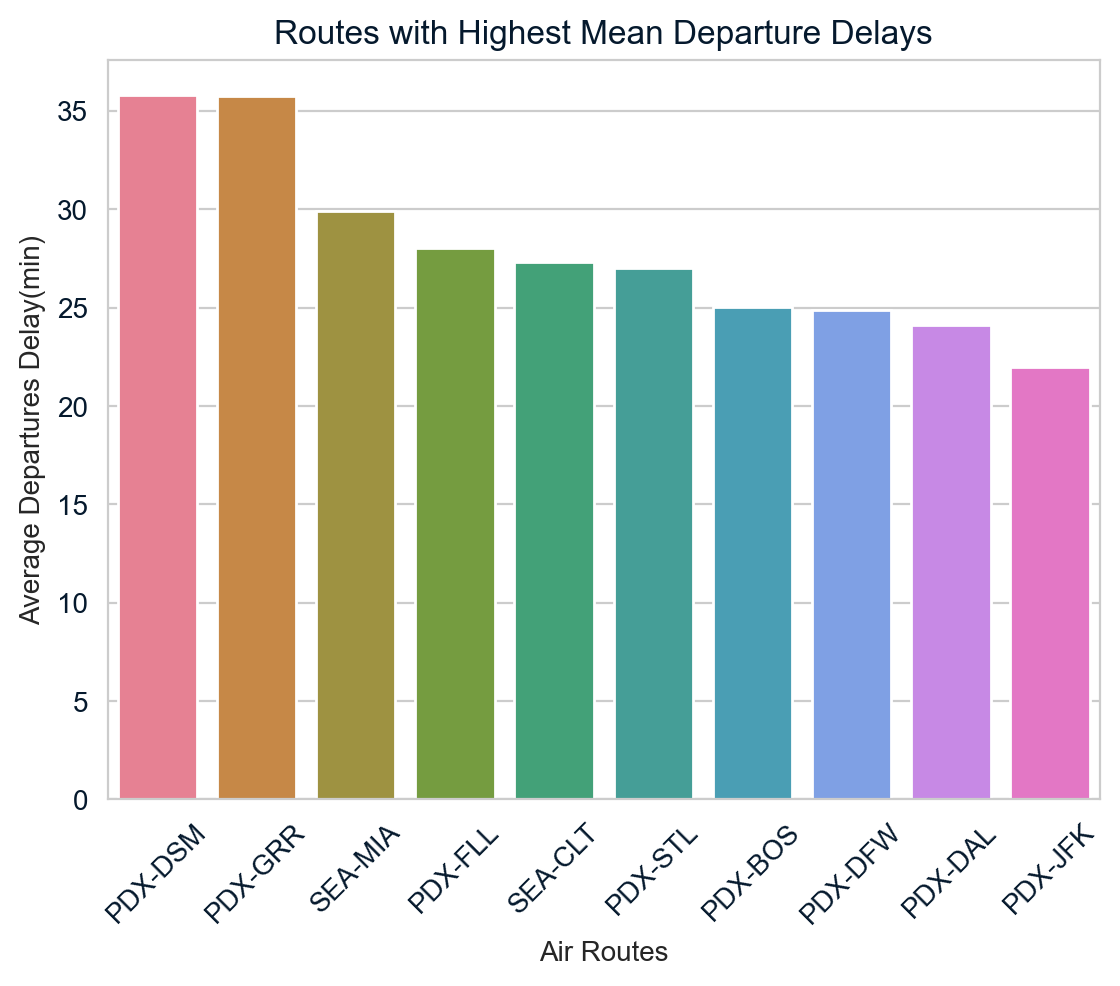

In [250]:
sns.set_style("whitegrid")
sns.barplot(data=top_routes_by_delay,x="route",y="avg_dep_delays",palette="husl");
plt.xlabel("Air Routes");
plt.ylabel("Average Departures Delay(min)");
plt.xticks(rotation=45);
plt.title("Routes with Highest Mean Departure Delays");

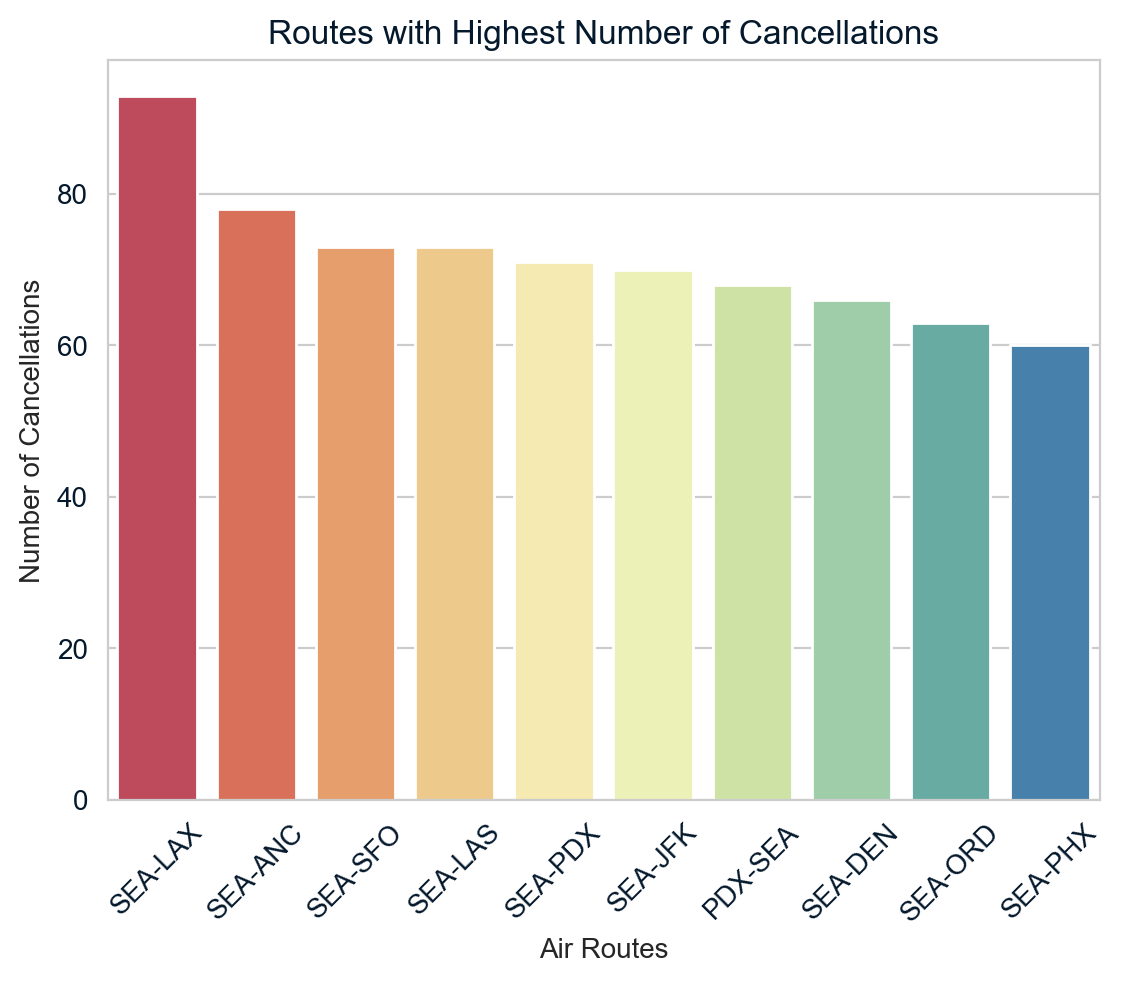

In [251]:
top9_route_cancels_bar, ax=plt.subplots()
sns.set_style("whitegrid")
sns.barplot(data=top_routes_by_cancellations,x="route",y="total_cancellations",palette="Spectral");
plt.xlabel("Air Routes");
plt.ylabel("Number of Cancellations");
plt.xticks(rotation=45);
plt.title("Routes with Highest Number of Cancellations");

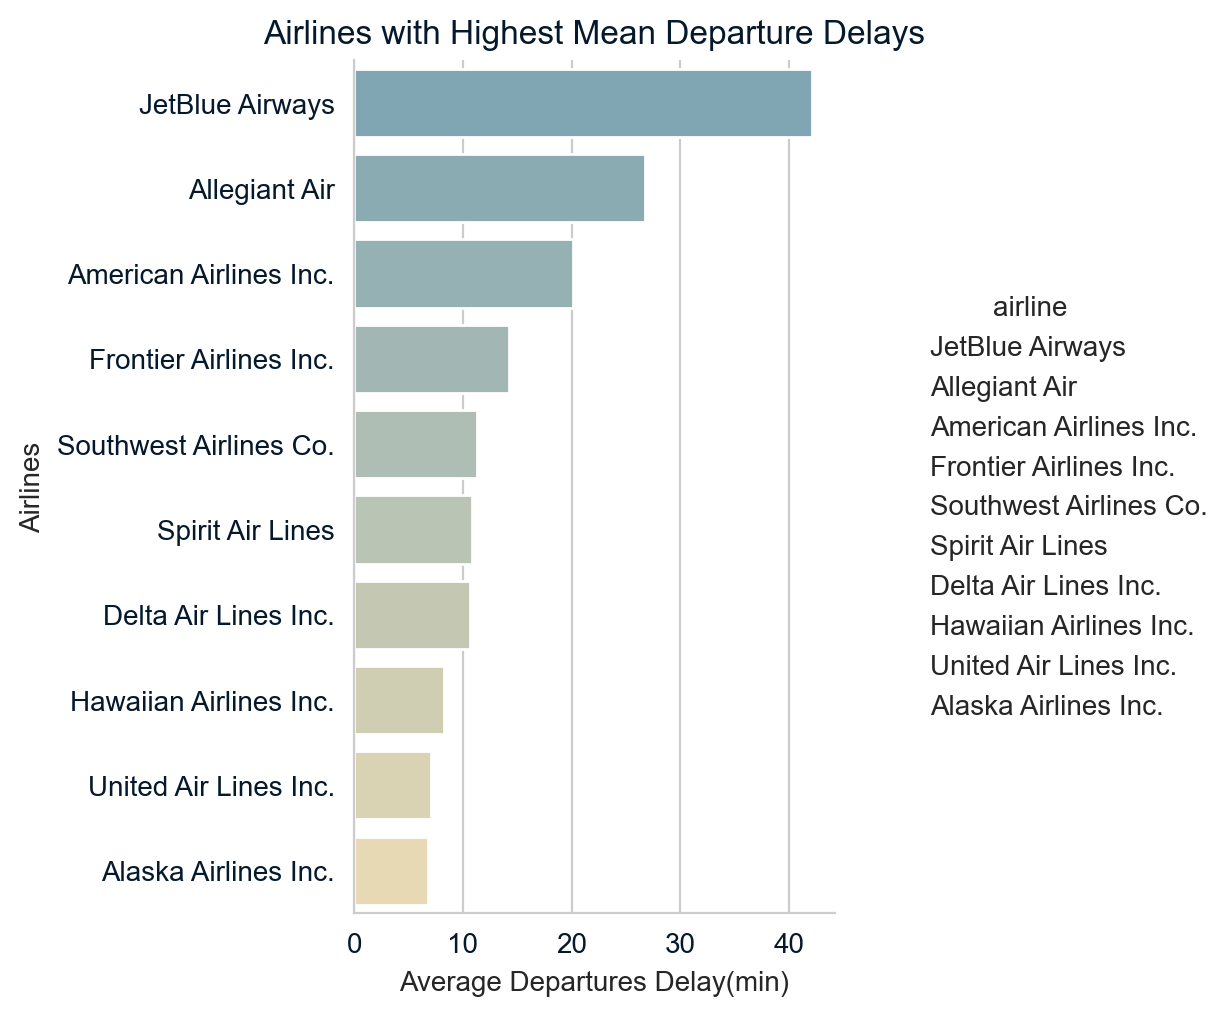

In [252]:
sns.set_style("whitegrid")
sns.catplot(data=top_airlines_by_delay,x="avg_dep_delays",y="airline",kind="bar",palette="blend:#7AB,#EDA");
plt.ylabel("Airlines");
plt.xlabel("Average Departures Delay(min)");
plt.title("Airlines with Highest Mean Departure Delays");

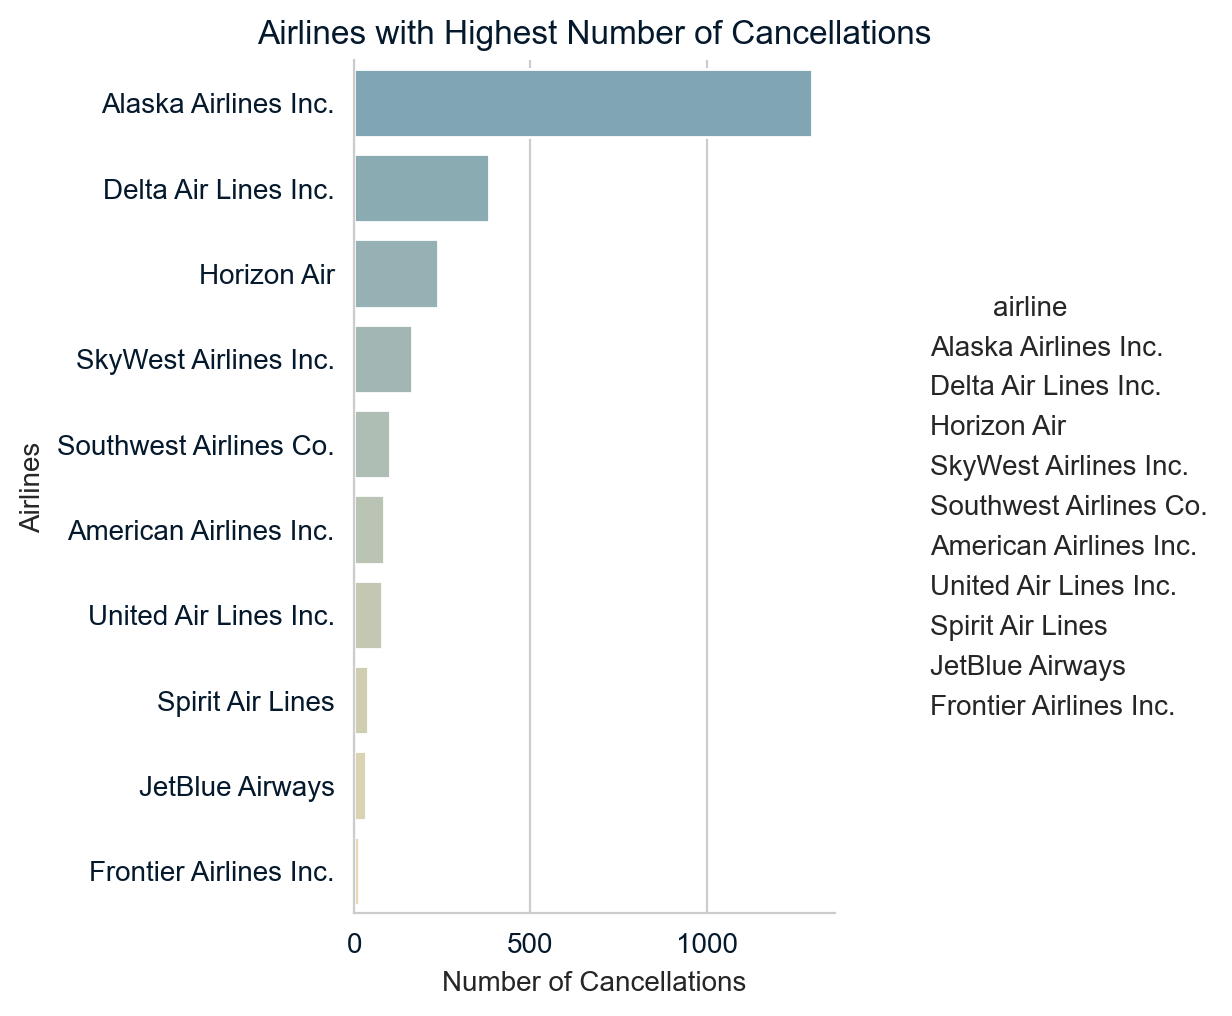

In [253]:
sns.set_style("whitegrid")
sns.catplot(data=top_airlines_by_cancellations,x="total_cancellations",y="airline",kind="bar",palette="blend:#7AB,#EDA")
plt.ylabel("Airlines");
plt.xlabel("Number of Cancellations");
plt.title("Airlines with Highest Number of Cancellations");

In [254]:
#Observing if 10 mile per hour wind gusts or more have a larger average departure delay for both of SEA and PDX
#Filtering departures from SEA and PDX
dep_sea_pdx=flights1[(flights1["route"].str.contains("SEA-")) | (flights1["route"].str.contains("PDX-"))]

In [255]:
dep_sea_pdx=dep_sea_pdx[["airline","route","dep_delay","wind_speed","wind_gust"]]

In [256]:
dep_sea_pdx["dep_from"]=dep_sea_pdx["route"].apply(lambda x: "SEA" if "SEA-" in x else 
                                                             "PDX" if "PDX-" in x else None
                                                                                                    )


In [257]:
dep_sea_pdx=dep_sea_pdx[["airline","dep_from","dep_delay","wind_speed","wind_gust"]]

In [258]:
dep_sea_pdx=dep_sea_pdx[dep_sea_pdx["wind_gust"]>=10]

In [259]:
dep_sea_pdx.groupby("dep_from").agg(average_delay_wind=("dep_delay","mean")).round(2)

,average_delay_wind
dep_from,
PDX,9.15
SEA,9.23


In [260]:
#Here is the informaiton about if wind gust affects delay or not. The wind gust above 10 affects the delay in minute negatively.So the wind response will be True.
wind_response=True

In [261]:
#Which airline's flight number is delayed the most?
by_flight_no=flights1.groupby(["airline","flight"]).agg(number_of_flights=("flight","count"),avg_delay=("dep_delay","mean"))

In [262]:
by_flight_no.loc[by_flight_no["number_of_flights"]>50].round(2).sort_values(by="avg_delay",
                                                                   ascending=False).head(10)

number_of_flights  avg_delay
airline                flight                              
SkyWest Airlines Inc.  1006                   55      47.92
American Airlines Inc. 551                    53      44.71
JetBlue Airways        95                     91      35.10
American Airlines Inc. 501                    62      30.47
Delta Air Lines Inc.   131                   120      29.68
                       246                    59      28.10
Southwest Airlines Co. 148                    51      27.41
Spirit Air Lines       92                     59      26.50
American Airlines Inc. 696                    57      24.91
Hawaiian Airlines Inc. 8                      89      24.30

In [263]:
top9_flight_no=by_flight_no.loc[by_flight_no["number_of_flights"]>50].round(2).sort_values(by="avg_delay",
                                                                   ascending=False).head(10)

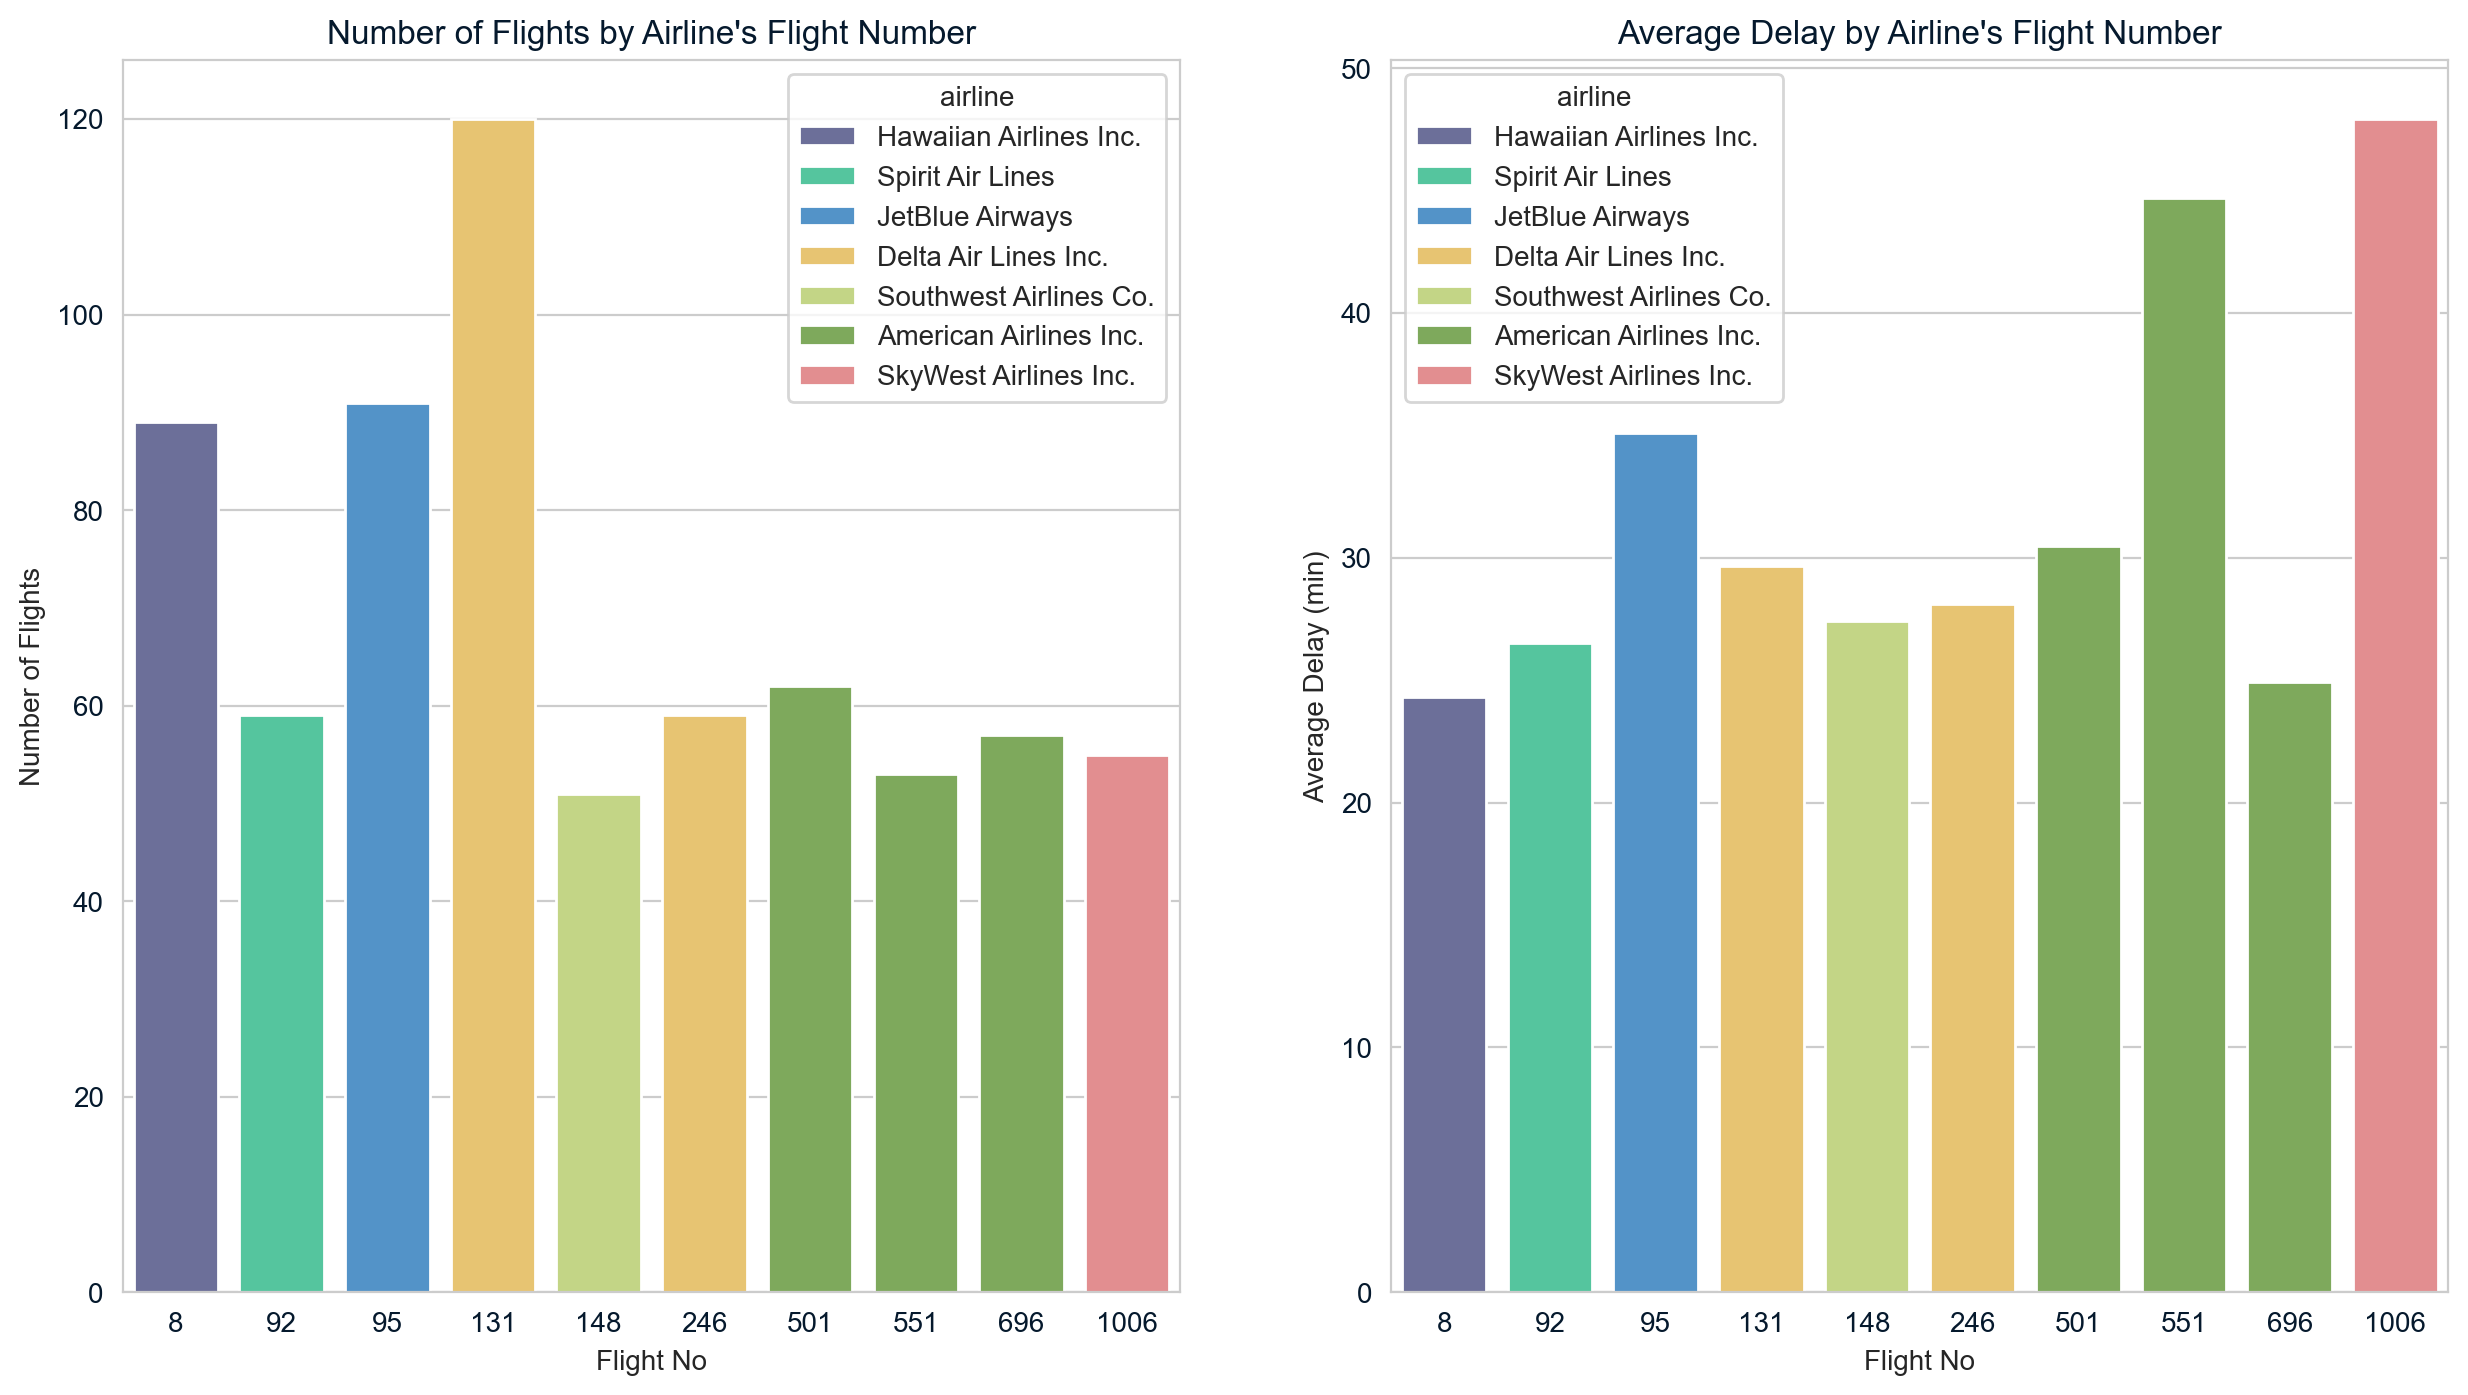

In [264]:
fig, ax = plt.subplots(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(data=top9_flight_no,x="flight",y="number_of_flights",hue="airline")
plt.ylabel("Number of Flights");
plt.xlabel("Flight No");
plt.title("Number of Flights by Airline's Flight Number");
plt.subplot(1,2,2)
sns.set_style("whitegrid")
sns.barplot(data=top9_flight_no,x="flight",y="avg_delay",hue="airline");
plt.ylabel("Average Delay (min)");
plt.xlabel("Flight No");
plt.title("Average Delay by Airline's Flight Number");
